# Explainable Recommendation System with Association Rule Mining
 ## Exploratory Data Analysis 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
pd.options.display.latex.repr=True
color = sns.color_palette()

In [4]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
products = pd.read_csv('products.csv')
products_prior = pd.read_csv("order_products__prior.csv")
products_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")

### get the information of these files:

In [5]:
aisles.shape

(134, 2)

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
departments.shape

(21, 2)

In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
products.shape

(49688, 4)

In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products_prior.shape

(32434489, 4)

In [12]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
products_train.shape

(1384617, 4)

In [14]:
products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [15]:
orders.shape

(3421083, 7)

In [40]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### merge these files:

In [16]:
order_products = pd.concat([products_prior, products_train])

In [17]:
df0 = pd.merge(orders, order_products, on='order_id')

In [18]:
df1 = pd.merge(df0, products, on = "product_id")

In [19]:
df2 = pd.merge(df1, departments, on = 'department_id')

In [20]:
df3 = pd.merge(df2, aisles, on = 'aisle_id')

In [21]:
df4 = df3.set_index(['user_id', 'order_number', 'add_to_cart_order'])

In [22]:
df = df4.sort_index()

In [23]:
df.head(50)

order_id eval_set  order_dow  \
user_id order_number add_to_cart_order                                 
1       1            1                   2539329    prior          2   
                     2                   2539329    prior          2   
                     3                   2539329    prior          2   
                     4                   2539329    prior          2   
                     5                   2539329    prior          2   
        2            1                   2398795    prior          3   
                     2                   2398795    prior          3   
                     3                   2398795    prior          3   
                     4                   2398795    prior          3   
                     5                   2398795    prior          3   
                     6                   2398795    prior          3   
        3            1                    473747    prior          3   
                     2                    473747    prior          3   
                     3                    473747    prior          3   
                     4                    473747    prior          3   
                     5                    473747    prior          3   
        4            1                   2254736    prior          4   
                     2                   2254736    prior          4   
                     3                   2254736    prior          4   
                     4                   2254736    prior          4   
                     5                   2254736    prior          4   
        5            1                    431534    prior          4   
                     2                    431534    prior          4   
                     3                    431534    prior          4   
                     4                    431534    prior          4   
                     5                    431534    prior          4   
                     6                    431534    prior          4   
                     7                    431534    prior          4   
                     8                    431534    prior          4   
        6            1                   3367565    prior          2   
                     2                   3367565    prior          2   
                     3                   3367565    prior          2   
                     4                   3367565    prior          2   
        7            1                    550135    prior          1   
                     2                    550135    prior          1   
                     3                    550135    prior          1   
                     4                    550135    prior          1   
                     5                    550135    prior          1   
        8            1                   3108588    prior          1   
                     2                   3108588    prior          1   
                     3                   3108588    prior          1   
                     4                   3108588    prior          1   
                     5                   3108588    prior          1   
                     6                   3108588    prior          1   
        9            1                   2295261    prior          1   
                     2                   2295261    prior          1   
                     3                   2295261    prior          1   
                     4                   2295261    prior          1   
                     5                   2295261    prior          1   
                     6                   2295261    prior          1   

                                        order_hour_of_day  \
user_id order_number add_to_cart_order                      
1       1            1                                  8   
                     2                                  8   
                     3                             

In [24]:
df.shape

(33819106, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33819106 entries, (1, 1, 1) to (206209, 14, 8)
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   eval_set                object 
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   reordered               int64  
 7   product_name            object 
 8   aisle_id                int64  
 9   department_id           int64  
 10  department              object 
 11  aisle                   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 3.3+ GB


### figure out the proportion of each eval set:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


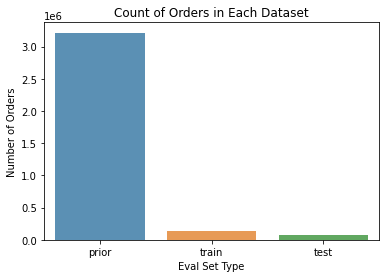

In [26]:
eval_set = orders.eval_set.value_counts()

sns.barplot(eval_set.index,eval_set.values,alpha = 0.8 )

plt.ylabel('Number of Orders')
plt.xlabel('Eval Set Type')
plt.title('Count of Orders in Each Dataset')
plt.show()

In [27]:
print(eval_set)

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


### relationship between orders and time

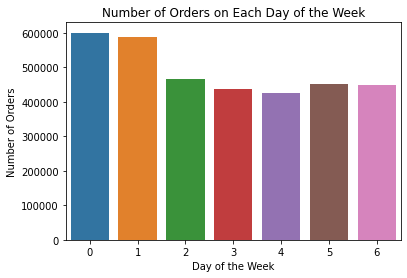

In [28]:
sns.countplot(x='order_dow',data = orders)
plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Number of Orders on Each Day of the Week')
plt.show()

since 0 represent the Saturday and 1 represent the Sunday
Saturday is the most popular day and Wedneday is the least popular day

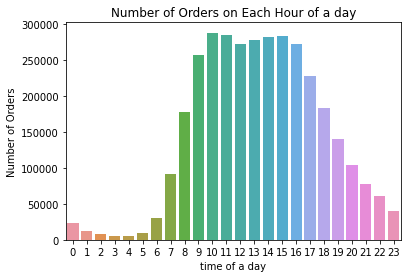

In [29]:
sns.countplot(x='order_hour_of_day',data = orders)
plt.ylabel('Number of Orders')
plt.xlabel('time of a day')
plt.title('Number of Orders on Each Hour of a day')
plt.show()

10-16 is the most popular time in a day

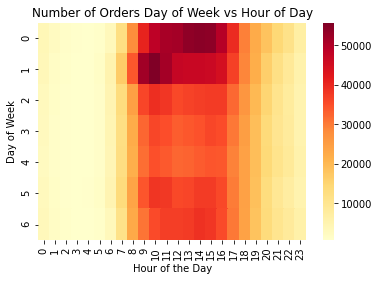

In [30]:
hour_dow =orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
hour_dow =hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(hour_dow, cmap='YlOrRd')
plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

we can see that: saturday 12-16 and sunday 8-10 is the most popular time.

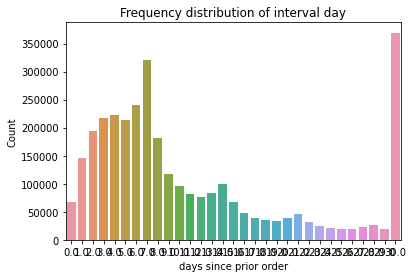

In [35]:
sns.countplot(x='days_since_prior_order',data = orders)
plt.ylabel('Count')
plt.xlabel('days since prior order')
plt.title('Frequency distribution of interval day')
plt.show()

peak appear at 7, 14, and 21, 28 (week interval)

### figure out the re-ordered percentage:

In [42]:
a=products_prior.reordered.sum() / products_prior.shape[0]
print(a)

0.5896974667922161


In [43]:
b=products_train.reordered.sum()/products_train.shape[0]
print(b)

0.5985944127509629


In [44]:
(a+b)/2

0.5941459397715896

about 59.4% products be reordered.

### figure out the number of products in each order:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


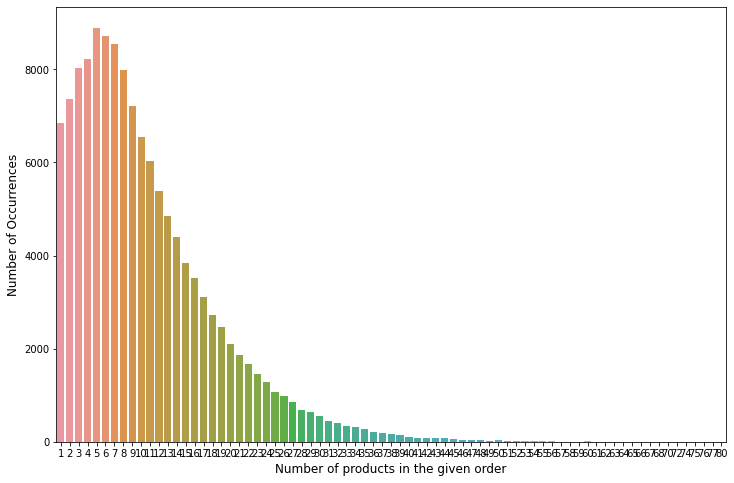

In [47]:
grouped_df = products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
#plt.xticks(rotation='vertical')
plt.show()

we can see from that 3-9 is the most frequent number.

### figure out deparment distribution: 

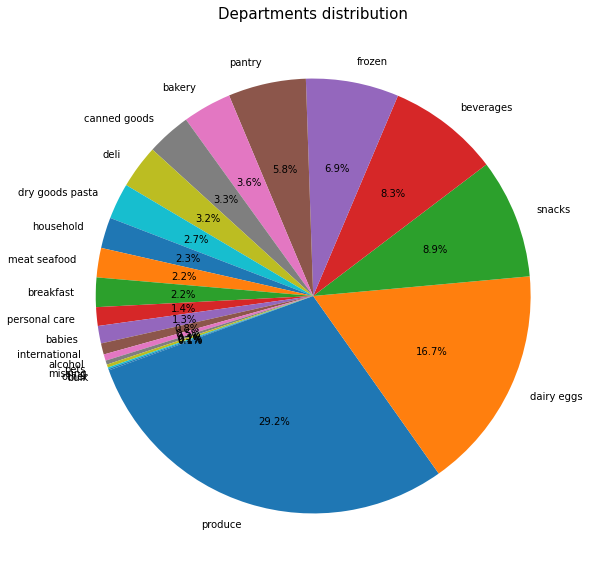

In [57]:
plt.figure(figsize=(10,10))
temp_series = df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

the products in produce deparment is the most salable.

### figure out the distribution of aisle:

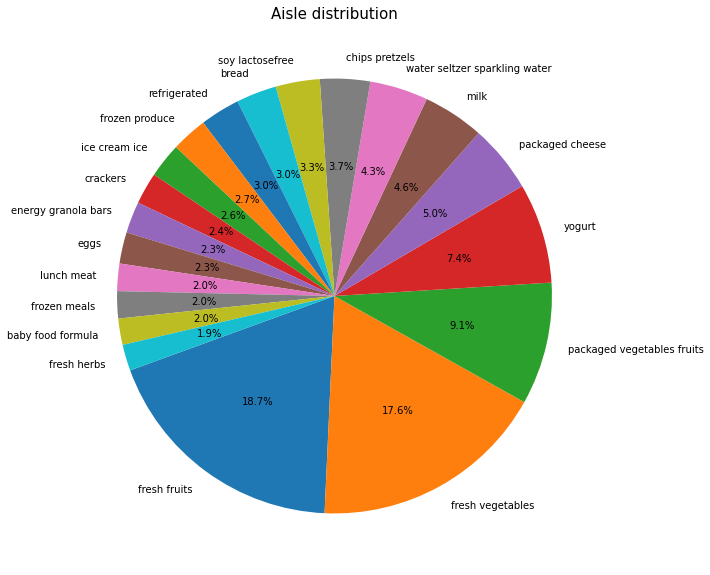

In [58]:
plt.figure(figsize=(10,10))
temp_series = df['aisle'].value_counts().head(20)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisle distribution", fontsize=15)
plt.show()

we can see from that the fruit and vegetables is most popular aisles.

### figure out the most popular products:

In [85]:
cnt_srs = df['product_name'].value_counts().sort_values(ascending=False).reset_index().head(50)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


### relationship between reordered ratio and departments:

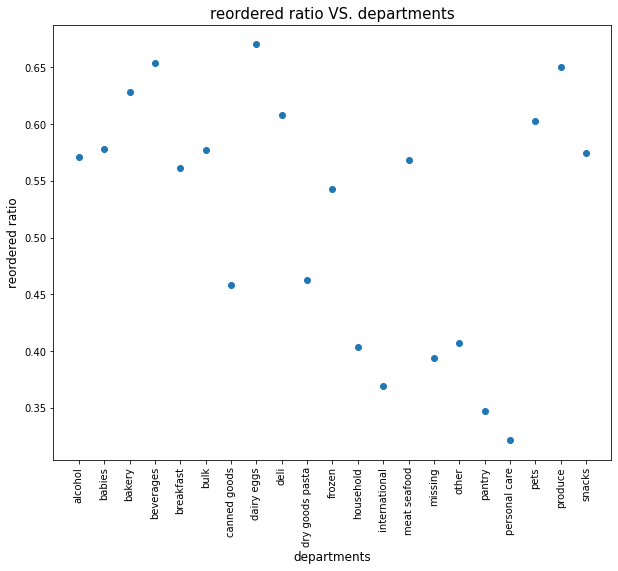

In [69]:
grouped_df = df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(10,8))
plt.scatter(grouped_df['department'],grouped_df['reordered'])
plt.xticks(rotation='vertical')
plt.xlabel("departments",fontsize = 12)
plt.ylabel("reordered ratio",fontsize = 12)
plt.title("reordered ratio VS. departments",fontsize = 15)
plt.show()

### relationship between reordered ratio and aisle:

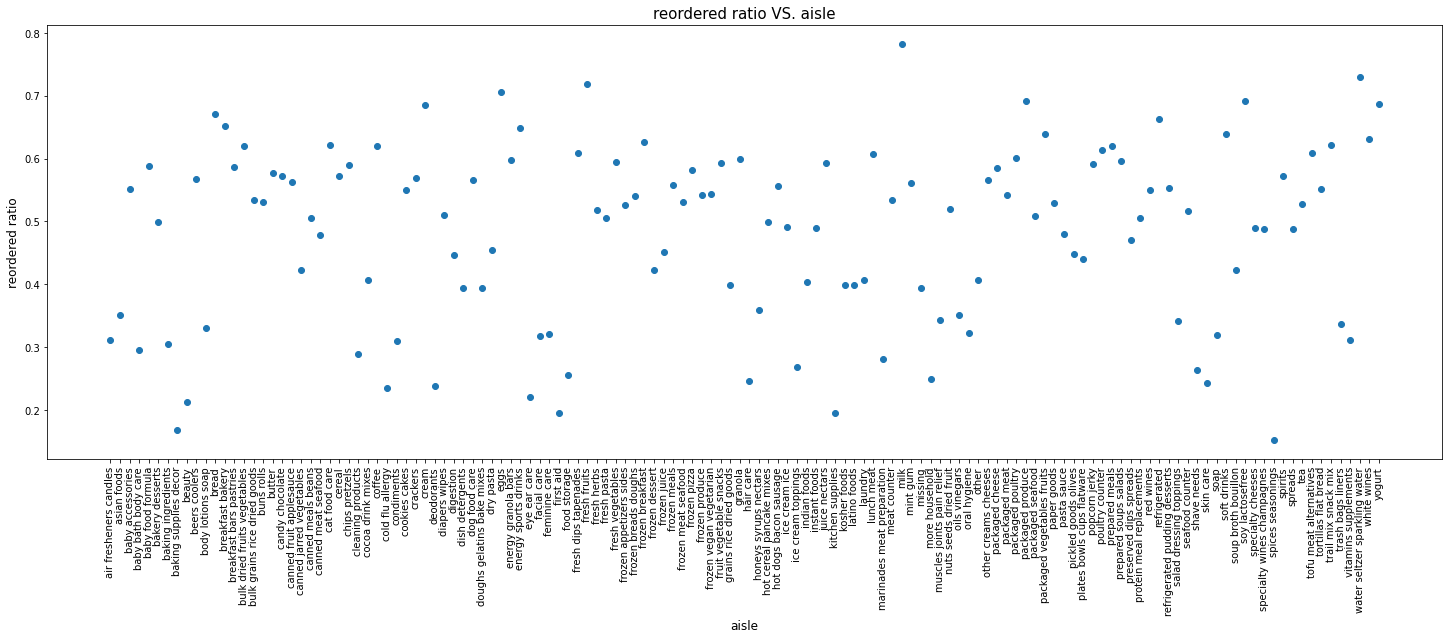

In [72]:
grouped_df = df.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(25,8))
plt.scatter(grouped_df['aisle'],grouped_df['reordered'])
plt.xticks(rotation='vertical')
plt.xlabel("aisle",fontsize = 12)
plt.ylabel("reordered ratio",fontsize = 12)
plt.title("reordered ratio VS. aisle",fontsize = 15)
plt.show()

### most frequent reordered products:

In [86]:
grouped_df = df.groupby(["product_name"])["reordered"].aggregate("mean").sort_values(ascending=False).reset_index().head(50)
grouped_df.columns = ['product_name', 'reordered']
grouped_df

,product_name,reordered
0,Raw Veggie Wrappers,0.942029
1,Serenity Ultimate Extrema Overnight Pads,0.933333
2,Orange Energy Shots,0.923077
3,Chocolate Love Bar,0.921569
4,Soy Powder Infant Formula,0.914286
5,Simply Sleep Nighttime Sleep Aid,0.911111
6,"Energy Shot, Grape Flavor",0.909091
7,Russian River Valley Reserve Pinot Noir,0.900000
8,Bars Peanut Butter,0.898551
9,Soy Crisps Lightly Salted,0.895522


we can see from that the heightest redordered ratio can up to 0.94!